# 2A.ml - Bayesian models with Python

Modèles de mélanges de lois. Statistiques bayésiennes. *bayespy*, *scikit-learn*.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

You can read [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb). Results might be different between examples. The example used is the same but the default parameters the optimisation uses are different.

We try different python model to deal with a Bayesian problem: a Gaussian Mixture. We will use the following example.

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

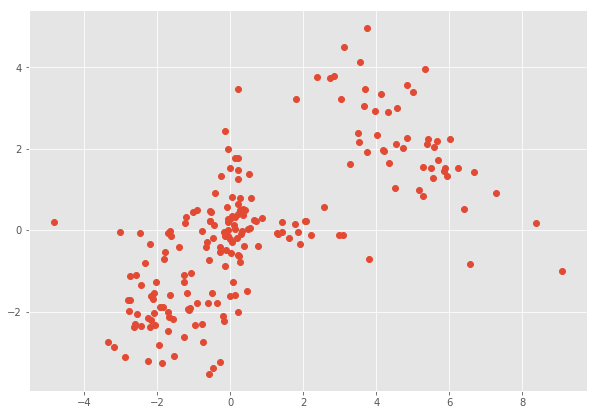

In [4]:
import numpy as np
y0 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 0.1]], size=50)
y1 = np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 2]], size=50)
y2 = np.random.multivariate_normal([5, 2], [[2, -1.5], [-1.5, 2]], size=50)
y3 = np.random.multivariate_normal([-2, -2], [[0.5, 0], [0, 0.5]], size=50)
y = np.vstack([y0, y1, y2, y3])
X=y

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot("111")
ax.plot(y[:,0], y[:,1], "o");

<h3 id="bayespy">bayespy</h3>

The module [bayespy](http://www.bayespy.org/) allows to build and estimate simple bayesian models. I just replicate the example on the [Gaussian mixture model](http://www.bayespy.org/examples/gmm.html).

We define the model:

In [5]:
from bayespy import __version__ as v1
from numpy import __version__ as v2
v1, v2

('0.5.12', '1.14.0')

Si cela ne marche pas avec la version 1.14 de numpy, vous devriez essayez la version 1.13 (a priori, cette [exception](https://github.com/numpy/numpy/blob/master/numpy/core/einsumfunc.py#L710) pose problème).

In [6]:
N = 200  # number of data vectors
D = 2    # dimension
K = 10   # maximum number of clusters

In [7]:
from bayespy.nodes import Dirichlet, Categorical, Gaussian, Wishart, Mixture
alpha = Dirichlet(1e-5*np.ones(K), name='alpha')
Z = Categorical(alpha, plates=(N,), name='z')
mu = Gaussian(np.zeros(D), 1e-5*np.identity(D), plates=(K,), name='mu')
sigma = Wishart(D, 1e-5*np.identity(D), plates=(K,), name='Lambda')
Y = Mixture(Z, Gaussian, mu, sigma, name='Y')

c:\python364_x64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
Z.initialize_from_random()

In [9]:
from bayespy.inference import VB
Q = VB(Y, mu, sigma, Z, alpha)

In [10]:
Y.observe(y)

In [11]:
Q.update(repeat=1000)

Iteration 1: loglike=-1.468308e+03 (0.014 seconds)
Iteration 2: loglike=-1.334298e+03 (0.013 seconds)
Iteration 3: loglike=-1.324890e+03 (0.008 seconds)
Iteration 4: loglike=-1.316611e+03 (0.008 seconds)
Iteration 5: loglike=-1.309316e+03 (0.008 seconds)
Iteration 6: loglike=-1.303605e+03 (0.008 seconds)
Iteration 7: loglike=-1.299580e+03 (0.008 seconds)
Iteration 8: loglike=-1.296177e+03 (0.008 seconds)
Iteration 9: loglike=-1.292610e+03 (0.009 seconds)
Iteration 10: loglike=-1.288500e+03 (0.007 seconds)
Iteration 11: loglike=-1.283598e+03 (0.008 seconds)
Iteration 12: loglike=-1.277488e+03 (0.008 seconds)
Iteration 13: loglike=-1.269190e+03 (0.007 seconds)
Iteration 14: loglike=-1.256292e+03 (0.007 seconds)
Iteration 15: loglike=-1.234579e+03 (0.007 seconds)
Iteration 16: loglike=-1.211326e+03 (0.007 seconds)
Iteration 17: loglike=-1.177000e+03 (0.008 seconds)
Iteration 18: loglike=-1.166708e+03 (0.007 seconds)
Iteration 19: loglike=-1.156378e+03 (0.007 seconds)
Iteration 20: loglike

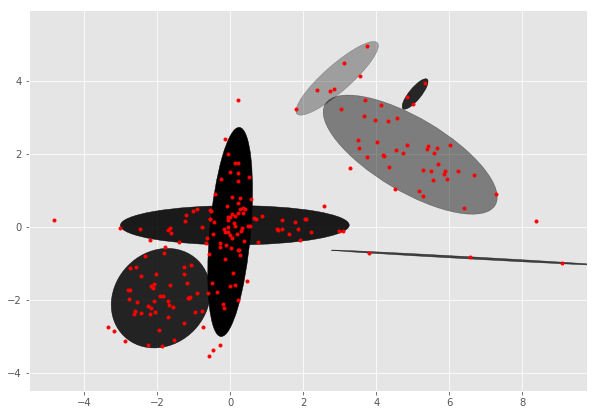

In [12]:
import bayespy.plot as bpplt
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot("111")
bpplt.gaussian_mixture_2d(Y, alpha=alpha, scale=2, color="black", fill=True, axes=ax)

We get the result of the optimization:

In [13]:
from bayespy.inference.vmp.nodes.gaussian import GaussianWishartMoments
parent = Y.parents[1]
(mu, _, sigma, _) = parent.get_moments()
mu, sigma

(array([[ 2.40154701e+02, -8.30453303e+01],
        [ 5.40823693e-02, -7.08214698e-02],
        [-3.63503268e+00, -3.71061355e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 4.84289522e-02,  6.63872665e-01],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.00479247e+01,  1.34655609e+01],
        [-1.18341948e+02, -2.16731559e+03],
        [-1.57604981e+01,  3.15478982e+01]]),
 array([[[ 9.48320957e+01, -6.58056747e+01],
         [-6.58056747e+01,  6.86033451e+01]],
 
        [[ 1.26452771e+01, -1.07681959e+00],
         [-1.07681959e+00,  5.78892196e-01]],
 
        [[ 2.20886879e+00, -2.95971379e-01],
         [-2.95971379e-01,  2.19230023e+00]],
 
        [[ 2.00000000e+05,  0.00000000e+00],
         [ 0.00000000e+00,  2.00000000e+05]],
 
        [[ 2.00000000e+05,  0.00000000e+00],
         [ 0.00000000e+00,  2.00000000e+05]],
 
        [[ 4.06971901e-01, -1.42148584e-02],
         [-1.42148584e-02,  1.38110338e+01]],
 


In [14]:
import numpy as np
mu2 = np.linalg.solve(sigma, mu)
mu2

array([[ 5.06136814,  3.64444933],
       [-0.0072969 , -0.13591289],
       [-1.90694018, -1.95001269],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.12068155,  0.04819249],
       [ 0.        ,  0.        ],
       [ 4.9274566 ,  1.9827726 ],
       [ 6.48766775, -0.84165122],
       [ 2.92536528,  4.07416803]])

The way you can build your model is quite nice but it still needs some development. scikit-learn proposes a better interface.

<h3 id="scikit">scikit-learn</h3>

We try to solve the same problem with another module: [scikit-learn](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#example-mixture-plot-gmm-py).

In [15]:
from sklearn import mixture
gmm = mixture.GaussianMixture (n_components=10, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [16]:
dpgmm = mixture.BayesianGaussianMixture(n_components=10, covariance_type='full')
dpgmm.fit(X)

c:\python364_x64\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

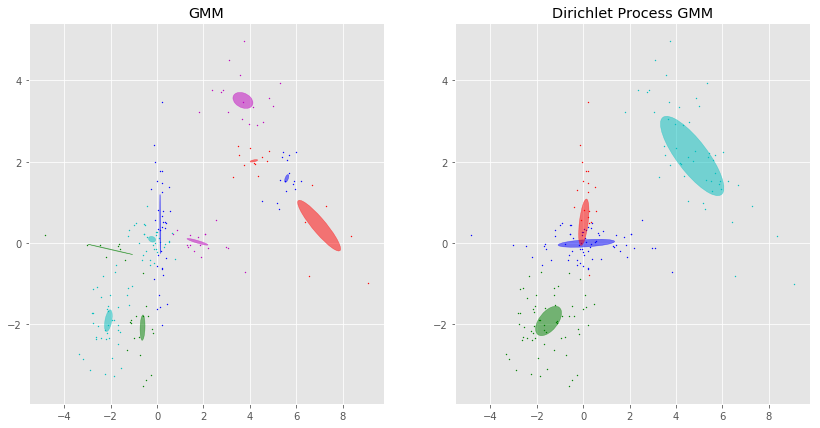

In [17]:
import itertools
import matplotlib as mpl
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])
f, axarr = plt.subplots(1, 2, figsize=(14,7))

for i, (clf, title) in enumerate([(gmm, 'GMM'),
                                  (dpgmm, 'Dirichlet Process GMM')]):
    splot = axarr[i]
    Y_ = clf.predict(X)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf.covariances_, color_iter)):
        v, w = np.linalg.eigh(covar)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        splot.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        splot.set_title(title)